## Creating Fractals through attractor functions

An attractor is a function $f:\mathbb{R}^2 \to\mathbb{R}^2$ that maps coordinates on new coordinates. Applying the function again and again results in a trajectory of coordinates. When we create large enough trajectories we'll find that some spots are getting visited more often by the trajectory than others.
Visualizing the trajectory while coloring the spots according to how often they are getting visited results in beautiful fractals.

In [1]:
import numpy as np
import pandas as pd
import datashader as ds
from datashader import transfer_functions as tf
from datashader.colors import inferno, viridis
from numba import jit
from colorcet import palette
import matplotlib.pyplot as plt
import seaborn as sns;sns.set()

%matplotlib inline

n = 100000000

### Attractor Function

We define an attractor function which depends on parameter constants.
And we define a trajectory function, which calls the attractor function for a fixed number of iterations and uses the output of each iteration as input for the next iteration.

The attractor function we use is the Clifford Attractor

$$ x_{n+1} = \sin(ay_n) + c\cos(ax_n) $$
$$ y_{n+1} = \sin(bx_n) + d\cos(by_n) $$

In [2]:
@jit
def Clifford(x, y, a, b, c, d, *o):
    return np.sin(a * y) + c * np.cos(a * x), \
           np.sin(b * x) + d * np.cos(b * y)

In [3]:
@jit
def trajectory(fn, x0, y0, a, b=0, c=0, d=0, e=0, f=0, n=n):
    x, y = np.zeros(n), np.zeros(n)
    x[0], y[0] = x0, y0
    for i in np.arange(n-1):
        x[i+1], y[i+1] = fn(x[i], y[i], a, b, c, d, e, f)
    return pd.DataFrame(dict(x=x,y=y))

### Parameter

In [4]:
a = 0
b = 0
c = -1.7
d =  1.3
e = -1.8
f =  1.9

In [5]:
vals = [a, b, c, d, e, f]

### Trajectory

In [6]:
df = trajectory(Clifford, *vals, n=100)
df.head()

,x,y
0,0.000000,0.000000
1,-1.800000,1.900000
2,1.882304,-2.205845
3,1.225430,-1.189050
4,1.782733,1.047308


Text(0, 0.5, 'Coordinates')

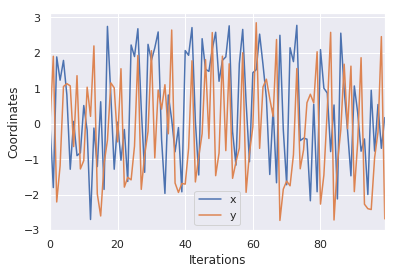

In [7]:
df.x.plot(label='x')
df.y.plot(label='y')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Coordinates')

### Image
Lets create a plot function to look at the trajectory as an image with coloring.

In [8]:
def dsplot(fn, vals, n=n, cmap=inferno, label=True):
    """Return a Datashader image by collecting `n` trajectory points for the given attractor `fn`"""
    lab = ("{}, "*(len(vals)-1)+" {}").format(*vals) if label else None
    df  = trajectory(fn, *vals, n=n)
    cvs = ds.Canvas(plot_width = 400, plot_height = 400)
    agg = cvs.points(df, 'x', 'y')
    img = tf.shade(agg, cmap=cmap)
    return img

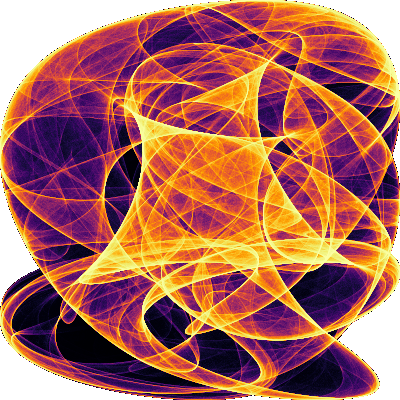

In [9]:
dsplot(Clifford, vals, n=n)